### Mengapa k fold validation itu penting

Sebelum kita mengenal Apa itu k fold validation Mengapa k fold itu diciptakan ?

Coba bayangkan kalau semisal kamu train_test_split lalu kebetulan ujianmu itu mudah-mudah atau bisa dibilang hoki sampai akurasinya itu bagus banget. Lalu ketika kamu coba training lagi lalu kamu kasih soal ujian yang lain ternyata dia apes dan akurasi nya gak terlalu bagus. Jadinya abu-abu kan, ini akurasinya mau dipilih yang hoki atau yang pas apes. 

Karena itu ada k fold. K fold yaitu kita akan mengilir train dan test untuk semua item dataset. jadi jika kita mempunyai test_size = 0.2 maka datasets pada skenario 1 akan mengambil 20 % item teratas sebagai data_test dan sisanya untuk train. Lalu pada skenario 2 itu akan mengambil 20 % sebagai data_test dibawahnya data test sebelumnya. Hal ini akan diulang ulang sampai semua nya telah rata. Pernah jadi data_test semua.

### ilustrasi

Agar lebih mudah pemahamanmu akan terdapat ilustrasi dari k fold

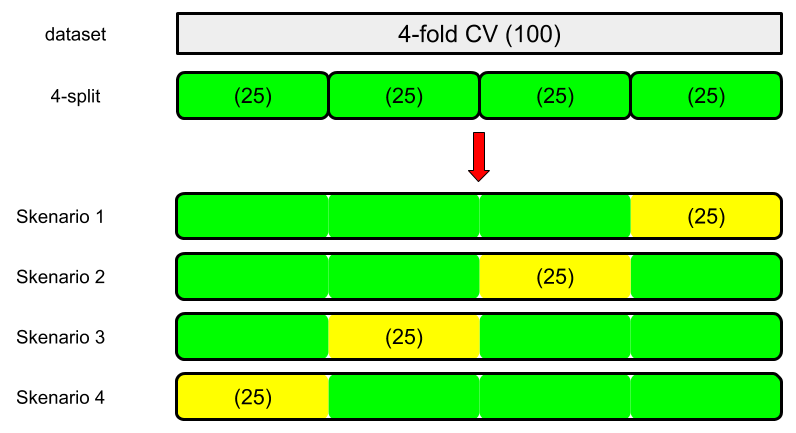

In [5]:
from luwiji.knn import illustration
illustration.kfold_cv

In [6]:
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

In [7]:
df = pd.read_csv("../data/titanic.csv", index_col="PassengerId")
# untuk parameter index_col digunakan untuk mengganti index built in dengan index yang sudah ada

df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
df.drop(columns=["Name", "Ticket"], inplace=True)
df.head(2)
df.drop(columns=["Age", "Cabin"], inplace=True)

df.Embarked.value_counts()
df.fillna({"Embarked": "S"}, inplace=True)

X = df.drop(columns="Survived")
y = df['Survived']
X = pd.get_dummies(X, columns=["Pclass", "Sex", "Embarked"])

In [12]:
knn = KNeighborsClassifier(n_neighbors=1)
score_cv = cross_val_score(knn, X, y, cv=5)
score_cv

array([0.63687151, 0.63483146, 0.80337079, 0.73033708, 0.71348315])

untuk menentukan hasil score akhir adalah dengan mencari rata-rata dari hasil semua akurasinya

In [13]:
score = score_cv.mean()

"score: " + str(score)

'score: 0.703778796058'

secara defaulth cross_val_score itu akan seperti ini

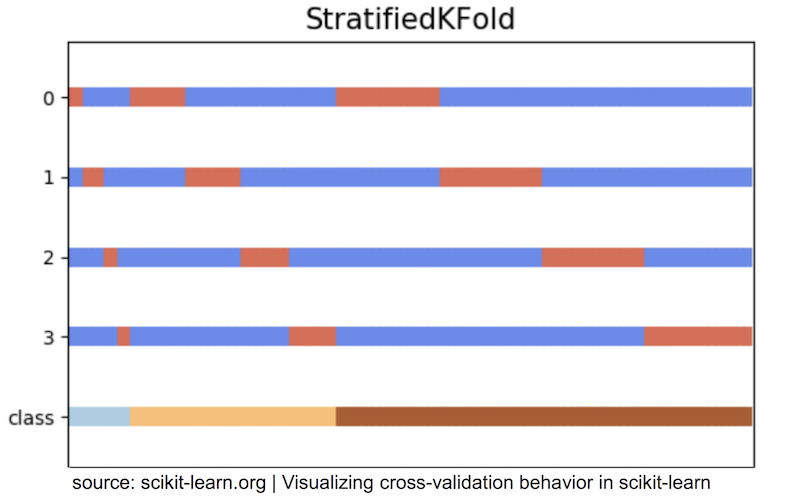

In [16]:
illustration.strat_kfold_cv